          new       year2
0  200.614633  181.027960
1  199.716863  164.124190
2  205.733141  171.638352
3  193.768958  174.801830
4  206.248877  198.362352


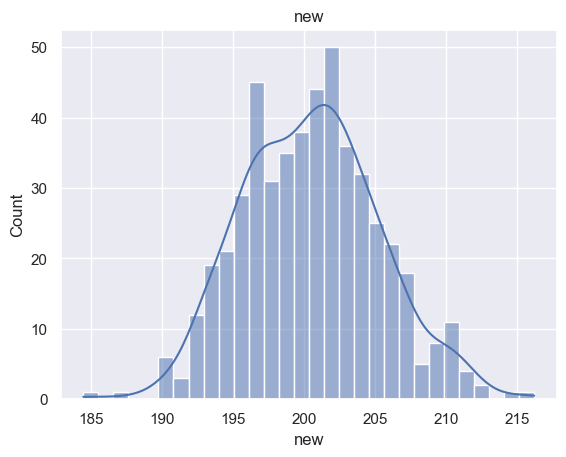

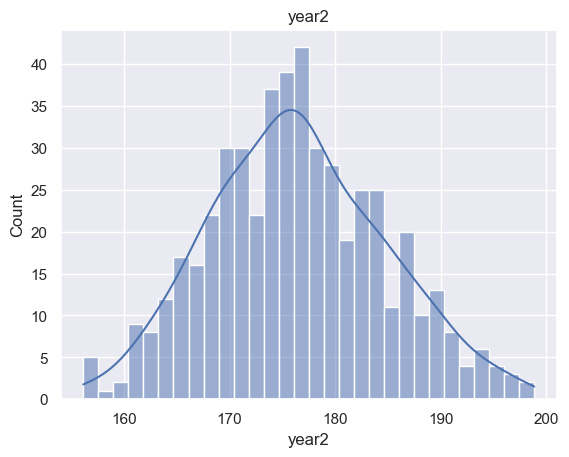

new 平均: 200.4746372262155 95%CI: (np.float64(200.0533518842937), np.float64(200.89592256813728))
year2 平均: 176.40215071111032 95%CI: (np.float64(175.6736405178838), np.float64(177.13066090433685))


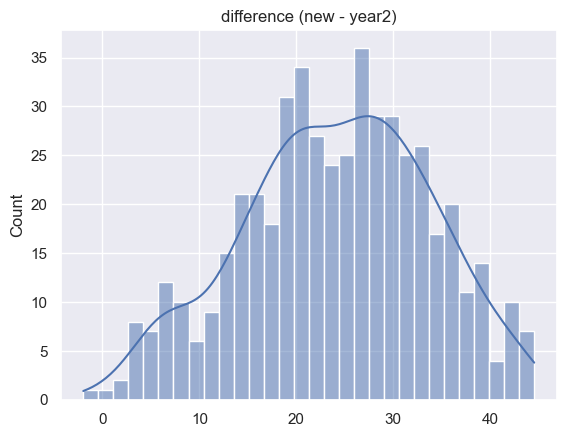

t = 9.465273816769793 p-value = 1.159466251292928e-19


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, ttest_1samp

# データ読み込み
df = pd.read_csv("batteries_hours.csv")

# new / year2 の確認
print(df.head())

# ヒストグラム
sns.histplot(df["new"], bins=30, kde=True)
plt.title("new")
plt.show()

sns.histplot(df["year2"], bins=30, kde=True)
plt.title("year2")
plt.show()

# 母平均と95%信頼区間の関数
def mean_ci_95(x):
    x = x.dropna().to_numpy()
    n = len(x)
    xbar = x.mean()
    s = x.std(ddof=1)
    SE = s / np.sqrt(n)
    tcrit = t.ppf(0.975, df=n-1)
    return xbar, (xbar - tcrit*SE, xbar + tcrit*SE)

mean_new, ci_new = mean_ci_95(df["new"])
mean_y2, ci_y2  = mean_ci_95(df["year2"])

print("new 平均:", mean_new, "95%CI:", ci_new)
print("year2 平均:", mean_y2, "95%CI:", ci_y2)

# 差を計算
diff = df["new"] - df["year2"]

sns.histplot(diff, bins=30, kde=True)
plt.title("difference (new - year2)")
plt.show()

# 対応のあるt検定（減少量が20かどうか）
res = ttest_1samp(diff, popmean=20)
print("t =", res.statistic, "p-value =", res.pvalue)
